# Phân tích khám phá và trực quan

## Data Dictionary

| Feature Name | Type | Description |
| :- | -: | :-: |
| Time| Categorical | Thời gian trong ngày (cụ thể là giờ)|
| Temperature | Integer | Nhiệt độ (*F)|
| Dew_Point | Integer | Nhiệt độ điểm sương là nhiệt độ khí bão hòa với hơi nước khiến hơi nước hóa lỏng (*F)|
| Humidity | Integer | Độ ẩm (%)|
| Wind | Categorical | Hướng gó:north wind (N), north-northeast wind (NNE), northeast wind (NE), east-northeast wind (ENE), east wind (E) , east-southeast wind (ESE), southeast wind (SE) , south-southeast wind (SSE), south wind (S) , south-southwest wind (SSW), southwest wind (SW) , west-southwest wind (WSW), west wind (W) , west-northwest wind (WNW), northwest wind (NW), north-northwest wind (NNW), north wind (N)|
| Wind_Speed | Integer | Tốc độ gió (mph)|
| Wind_Gust | Float | Gió giật (mph)|
| Pressure | Float | Áp suất (in)|
| Precip | Categorical | Lượng mưa (in)|
| Condition | Categorical | Điều kiện thời tiết tại thời điểm quan sát |
| Date | Date | Ngày, tháng, năm|
| Region | Categorical | Địa điểm thu thập dữ liệu|

## Data preprocessing

### Loading Data

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
from scipy import stats
from sklearn.impute import KNNImputer

import panel as pn
pn.extension('tabulator')

import hvplot.pandas

In [134]:
df = pd.read_csv('Total_weather_dataset_SG_DN_HN.csv')
df.sample(10)

,Unnamed: 0,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition,Date,Region
193384,193384,9:00 PM,72.0,63.0,73.0,ENE,6.0,0.0,29.87,0.0 in,Fair,2022-04-20,Ha Noi
6471,6471,5:30 AM,79.0,79.0,100.0,CALM,0.0,0.0,29.76,0.0 in,Fair,2019-05-17,Sai Gon
72344,72344,5:00 PM,82.0,73.0,74.0,ESE,6.0,0.0,29.89,0.0 in,Fair,2019-04-01,Da Nang
103259,103259,2:00 PM,68.0,55.0,64.0,NNW,14.0,0.0,30.11,0.0 in,Mostly Cloudy,2021-01-11,Da Nang
118519,118519,7:00 PM,75.0,68.0,78.0,NNW,7.0,0.0,29.97,0.0 in,Mostly Cloudy,2021-11-27,Da Nang
125285,125285,3:30 AM,75.0,72.0,89.0,CALM,0.0,0.0,29.85,0.0 in,Fair,2022-04-18,Da Nang
106591,106591,3:30 PM,73.0,64.0,73.0,NNW,5.0,0.0,29.97,0.0 in,Mostly Cloudy,2021-03-23,Da Nang
93385,93385,12:00 PM,93.0,72.0,49.0,SW,13.0,0.0,29.70,0.0 in,Partly Cloudy,2020-06-17,Da Nang
42697,42697,4:30 PM,91.0,73.0,55.0,WSW,9.0,0.0,29.73,0.0 in,Partly Cloudy,2021-06-18,Sai Gon
140605,140605,6:00 AM,72.0,70.0,94.0,ENE,8.0,0.0,29.95,0.0 in,Mostly Cloudy,2019-04-05,Ha Noi


In [135]:
df.shape

(204044, 13)

In [136]:
df.columns

Index(['Unnamed: 0', 'Time', ' Temperature', ' Dew Point', ' Humidity',
       ' Wind', ' Wind Speed', ' Wind Gust', ' Pressure', ' Precip.',
       ' Condition', 'Date', 'Region'],
      dtype='object')

**Nhận xét:** 
- Bộ dữ liệu có 204044 mẫu quan sát với tổng cộng 12 thuộc tính và bị thừa thuộc tính 'Unnamed: 0'
- Ngoài ra, trong tên của các thuộc tính lại chứa khoảng trắng và dấu '.'

### Data Cleaning

In [137]:
# xóa cột 'Unnamed: 0' vì nó bị thừa
df = df.drop(columns = 'Unnamed: 0')

In [138]:
# thay đổi lại tên các thuộc tính còn lại
df.columns = ['Time', 'Temperature', 'Dew_Point', 'Humidity', 'Wind',
       'Wind_Speed', 'Wind_Gust', 'Pressure', 'Precip', 'Condition', 'Date', 'Region']

### Missing and Replace Data

In [139]:
# kiểm tra missing data cho df
df.isnull().sum()

Time            0
Temperature     0
Dew_Point       0
Humidity        0
Wind            0
Wind_Speed      0
Wind_Gust       0
Pressure        0
Precip          0
Condition      13
Date            0
Region          0
dtype: int64

**Nhận xét:**
chỉ có 1 feature chứa missing data
- `Condition` chứa 16 quan sát bị thiếu. Chúng có thể sử dụng thuật toán KNN để điền dữ liệu bị thiếu

In [140]:
# Sử dụng thuật toán KNN để điền dữ liệu bị thiếu
imputer = KNNImputer(n_neighbors=5)

In [141]:
# thay thế dữ liệu Nan bằng Unknow
df['Condition'].replace(to_replace=np.nan, value='Unknow', inplace=True)

In [142]:
df.isna().sum()

Time           0
Temperature    0
Dew_Point      0
Humidity       0
Wind           0
Wind_Speed     0
Wind_Gust      0
Pressure       0
Precip         0
Condition      0
Date           0
Region         0
dtype: int64

In [143]:
# xóa các kí hiệu và đơn vị trong dữ liệu
# df['Temperature'] = df['Temperature'].str.replace(" °F","")
# df['Dew_Point'] = df['Dew_Point'].str.replace(" °F","")
# df['Humidity'] = df['Humidity'].str.replace(" %","")

# df['Wind_Speed'] = df['Wind_Speed'].str.replace(" mph","")
# df['Wind_Gust'] = df['Wind_Gust'].str.replace(" mph","")
# df['Pressure'] = df['Pressure'].str.replace(" in","")
# df['Precip'] = df['Precip'].str.replace(" in","")

In [144]:
df.head()

,Time,Temperature,Dew_Point,Humidity,Wind,Wind_Speed,Wind_Gust,Pressure,Precip,Condition,Date,Region
0,12:00 AM,77.0,68.0,74.0,N,9.0,0.0,29.85,0.0 in,Mostly Cloudy,2019-01-02,Sai Gon
1,12:30 AM,77.0,68.0,74.0,N,12.0,0.0,29.85,0.0 in,Mostly Cloudy,2019-01-02,Sai Gon
2,1:00 AM,77.0,68.0,74.0,N,9.0,0.0,29.85,0.0 in,Mostly Cloudy,2019-01-02,Sai Gon
3,1:30 AM,77.0,68.0,74.0,N,12.0,0.0,29.82,0.0 in,Mostly Cloudy,2019-01-02,Sai Gon
4,2:00 AM,75.0,68.0,78.0,N,8.0,0.0,29.82,0.0 in,Mostly Cloudy,2019-01-02,Sai Gon


In [145]:
df['Wind_Gust'].value_counts()

0.00     203018
25.00        83
20.00        79
21.00        74
22.00        71
26.00        69
23.00        68
24.00        65
29.00        51
31.00        50
28.00        48
18.00        44
30.00        43
32.00        41
37.00        24
36.00        23
35.00        21
17.00        17
33.00        16
38.00        16
16.00        14
39.00        10
43.00        10
15.00         7
40.00         7
45.00         6
41.00         6
44.00         6
48.00         5
46.00         4
55.00         4
53.00         4
51.00         3
49.00         3
29.73         3
64.00         2
47.00         2
29.61         2
54.00         2
29.64         2
52.00         2
61.00         2
66.00         1
29.90         1
29.87         1
30.43         1
30.14         1
29.93         1
29.92         1
58.00         1
29.82         1
67.00         1
63.00         1
56.00         1
14.00         1
29.70         1
30.06         1
29.76         1
29.58         1
Name: Wind_Gust, dtype: int64

In [146]:
df['Precip'].value_counts()

 0.0 in        204021
                   13
 in Mostly          4
 in Partly          4
 in Light           1
 in Thunder         1
Name: Precip, dtype: int64

Nhận thấy rằng giá trị 0 ở thuộc tính `Wind_Gust` và `Precip` khá là nhiều lên đến hơn 200000 quan sát vì thế nên 2 thuộc tính này sẽ bị bỏ đi

In [147]:
df = df.drop(columns = ['Wind_Gust', 'Precip'])

In [148]:
df.head()

,Time,Temperature,Dew_Point,Humidity,Wind,Wind_Speed,Pressure,Condition,Date,Region
0,12:00 AM,77.0,68.0,74.0,N,9.0,29.85,Mostly Cloudy,2019-01-02,Sai Gon
1,12:30 AM,77.0,68.0,74.0,N,12.0,29.85,Mostly Cloudy,2019-01-02,Sai Gon
2,1:00 AM,77.0,68.0,74.0,N,9.0,29.85,Mostly Cloudy,2019-01-02,Sai Gon
3,1:30 AM,77.0,68.0,74.0,N,12.0,29.82,Mostly Cloudy,2019-01-02,Sai Gon
4,2:00 AM,75.0,68.0,78.0,N,8.0,29.82,Mostly Cloudy,2019-01-02,Sai Gon


### Data type

In [149]:
# kiểm tra kiểu dữ liệu của mỗi feature
df.dtypes

Time            object
Temperature    float64
Dew_Point      float64
Humidity       float64
Wind            object
Wind_Speed     float64
Pressure       float64
Condition       object
Date            object
Region          object
dtype: object

Kiểu dữ liệu của thuộc tính `Date` nên ra kiểu `datetime` thay vì kiểu `object` vì thế ta sẽ chuyển đổi sang thuộc tính này sang định dạng datetime với hàm `pd.to_datetime()`

In [150]:
# thay đổi kiểu dữ liệu của thuộc tính Date
df['Date'] = pd.to_datetime(df['Date'])

In [151]:
df.dtypes

Time                   object
Temperature           float64
Dew_Point             float64
Humidity              float64
Wind                   object
Wind_Speed            float64
Pressure              float64
Condition              object
Date           datetime64[ns]
Region                 object
dtype: object

- Giờ kiểm tra lại thì thấy dữ liệu đã ép kiểu thành công

### Convert Data

Vì thuộc tính `Temperature` và `Dew_Point` đang ở dạng độ F vì thế ta sẽ chuyển nó về dạng độ C vì độ C phù hợp với người Việt Nam hơn

In [152]:
# chuyển từ độ F sang độ C
df['Temperature'] = (df['Temperature']-32)/1.8
df['Dew_Point'] = (df['Dew_Point']-32)/1.8

In [153]:
df.head()

,Time,Temperature,Dew_Point,Humidity,Wind,Wind_Speed,Pressure,Condition,Date,Region
0,12:00 AM,25.000000,20.0,74.0,N,9.0,29.85,Mostly Cloudy,2019-01-02,Sai Gon
1,12:30 AM,25.000000,20.0,74.0,N,12.0,29.85,Mostly Cloudy,2019-01-02,Sai Gon
2,1:00 AM,25.000000,20.0,74.0,N,9.0,29.85,Mostly Cloudy,2019-01-02,Sai Gon
3,1:30 AM,25.000000,20.0,74.0,N,12.0,29.82,Mostly Cloudy,2019-01-02,Sai Gon
4,2:00 AM,23.888889,20.0,78.0,N,8.0,29.82,Mostly Cloudy,2019-01-02,Sai Gon


Ngoài các thuộc tính trên ta còn nhận thất rằng biên độ nhiệt trong ngày `Amplitude` cũng rất là cần thiết vì thế ta sẽ thêm thuộc tính này bằng cách lấy nhiệt độ cao nhất trong ngày trừ đi nhiệt độ thấp nhất 

In [154]:
# amp = pd.DataFrame(df.groupby("Date")['Temperature'].max() - df.groupby("Date")['Temperature'].min())
# amp.columns = ['Amplitude']
# amp = amp.reset_index()
# df = pd.merge(amp, df, how="inner", on=["Date", "Date"])

In [155]:
df_sg = df[df['Region']=='Sai Gon']
df_dn = df[df['Region']=='Da Nang']
df_hn =df[df['Region']=='Ha Noi']

In [156]:
df_sg = df[df['Region']=='Sai Gon']
df_dn = df[df['Region']=='Da Nang']
df_hn =df[df['Region']=='Ha Noi']

amp_sg = pd.DataFrame(df_sg.groupby("Date")['Temperature'].max() - df_sg.groupby("Date")['Temperature'].min())
amp_sg.columns = ['Amplitude']
amp_sg = amp_sg.reset_index()
df_sg = pd.merge(amp_sg, df_sg, how="inner", on=["Date", "Date"])

amp_dn = pd.DataFrame(df_dn.groupby("Date")['Temperature'].max() - df_dn.groupby("Date")['Temperature'].min())
amp_dn.columns = ['Amplitude']
amp_dn = amp_dn.reset_index()
df_dn = pd.merge(amp_dn, df_dn, how="inner", on=["Date", "Date"])

amp_hn = pd.DataFrame(df_hn.groupby("Date")['Temperature'].max() - df_hn.groupby("Date")['Temperature'].min())
amp_hn.columns = ['Amplitude']
amp_hn = amp_hn.reset_index()
df_hn = pd.merge(amp_hn, df_hn, how="inner", on=["Date", "Date"])

df = df_sg.append(df_dn, ignore_index=True).append(df_hn, ignore_index=True)

C:\Users\BEST PC\AppData\Local\Temp\ipykernel_19312\2520044944.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_sg.append(df_dn, ignore_index=True).append(df_hn, ignore_index=True)


In [157]:
df

,Date,Amplitude,Time,Temperature,Dew_Point,Humidity,Wind,Wind_Speed,Pressure,Condition,Region
0,2019-01-02,2.222222,12:00 AM,25.000000,20.000000,74.0,N,9.0,29.85,Mostly Cloudy,Sai Gon
1,2019-01-02,2.222222,12:30 AM,25.000000,20.000000,74.0,N,12.0,29.85,Mostly Cloudy,Sai Gon
2,2019-01-02,2.222222,1:00 AM,25.000000,20.000000,74.0,N,9.0,29.85,Mostly Cloudy,Sai Gon
3,2019-01-02,2.222222,1:30 AM,25.000000,20.000000,74.0,N,12.0,29.82,Mostly Cloudy,Sai Gon
4,2019-01-02,2.222222,2:00 AM,23.888889,20.000000,78.0,N,8.0,29.82,Mostly Cloudy,Sai Gon
...,...,...,...,...,...,...,...,...,...,...,...
204039,2022-11-29,7.222222,9:30 PM,27.222222,23.888889,84.0,SE,10.0,29.81,Mostly Cloudy,Ha Noi
204040,2022-11-29,7.222222,10:00 PM,26.111111,23.888889,89.0,ESE,9.0,29.84,Mostly Cloudy,Ha Noi
204041,2022-11-29,7.222222,10:30 PM,26.111111,23.888889,89.0,ESE,7.0,29.84,Mostly Cloudy,Ha Noi
204042,2022-11-29,7.222222,11:00 PM,26.111111,23.888889,89.0,ESE,10.0,29.84,Mostly Cloudy,Ha Noi


## EDA

### Thống kê mô tả

In [158]:
df.describe()

,Amplitude,Temperature,Dew_Point,Humidity,Wind_Speed,Pressure
count,204044.000000,204044.000000,204044.000000,204044.000000,204044.000000,204044.000000
mean,7.616699,26.776885,22.036227,77.001127,5.729117,29.780699
std,3.937543,4.592310,4.199840,15.520251,3.731431,0.617674
min,0.000000,-17.777778,-17.777778,0.000000,0.000000,0.000000
25%,6.111111,25.000000,20.000000,66.000000,3.000000,29.690000
50%,7.777778,27.222222,22.777778,79.000000,6.000000,29.770000
75%,8.888889,30.000000,25.000000,89.000000,8.000000,29.880000
max,55.555556,41.111111,30.000000,100.000000,403.000000,30.430000


### Các biến quan trọng

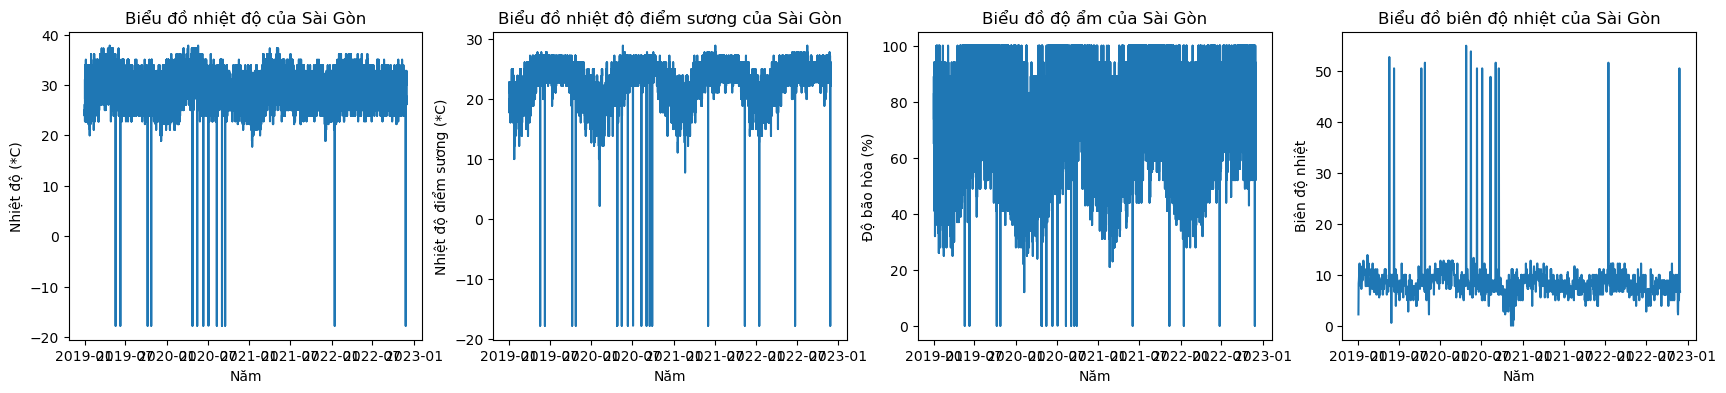

In [159]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize = (21,4))

axs[0].plot(df[df['Region']=='Sai Gon']['Date'],  df[df['Region']=='Sai Gon']['Temperature'])
# plt.plot(df['Date'],  df['Dew_Point'])
axs[0].set_title("Biểu đồ nhiệt độ của Sài Gòn")
axs[0].set_xlabel("Năm")
axs[0].set_ylabel("Nhiệt độ (*C)")

axs[1].plot(df[df['Region']=='Sai Gon']['Date'],  df[df['Region']=='Sai Gon']['Dew_Point'])
axs[1].set_title("Biểu đồ nhiệt độ điểm sương của Sài Gòn")
axs[1].set_xlabel("Năm")
axs[1].set_ylabel("Nhiệt độ điểm sương (*C)")

axs[2].plot(df[df['Region']=='Sai Gon']['Date'],  df[df['Region']=='Sai Gon']['Humidity'])
axs[2].set_title("Biểu đồ độ ẩm của Sài Gòn")
axs[2].set_xlabel("Năm")
axs[2].set_ylabel("Độ bão hòa (%)")

axs[3].plot(df[df['Region']=='Sai Gon']['Date'],  df[df['Region']=='Sai Gon']['Amplitude'])
axs[3].set_title("Biểu đồ biên độ nhiệt của Sài Gòn")
axs[3].set_xlabel("Năm")
axs[3].set_ylabel("Biên độ nhiệt")
plt.show()

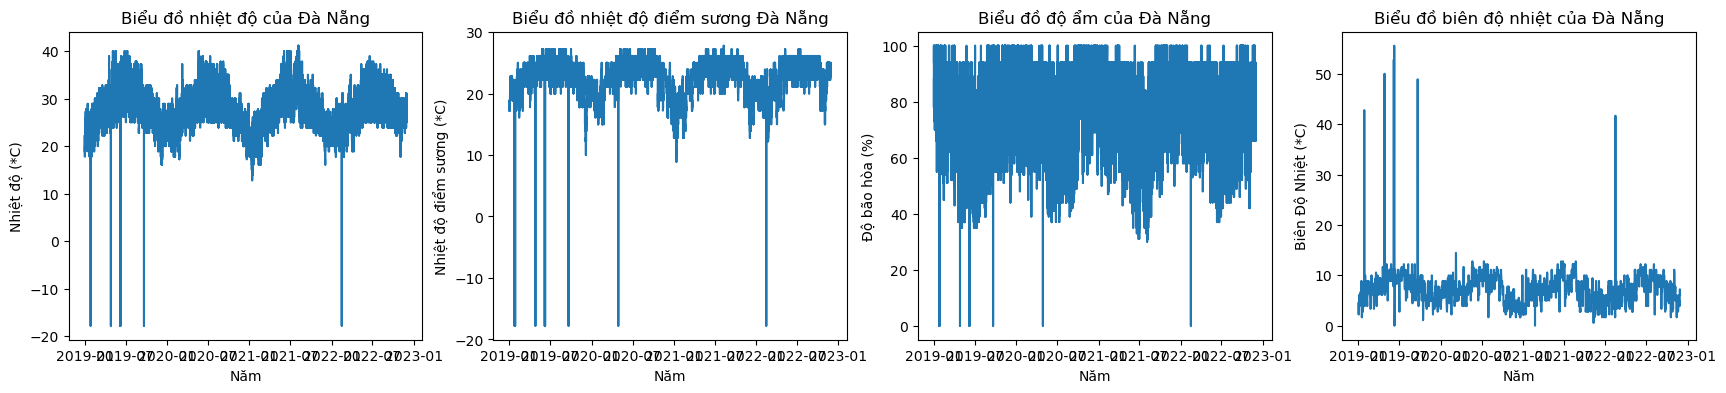

In [160]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize = (21,4))

axs[0].plot(df[df['Region']=='Da Nang']['Date'],  df[df['Region']=='Da Nang']['Temperature'])
# plt.plot(df['Date'],  df['Dew_Point'])
axs[0].set_title("Biểu đồ nhiệt độ của Đà Nẵng")
axs[0].set_xlabel("Năm")
axs[0].set_ylabel("Nhiệt độ (*C)")

axs[1].plot(df[df['Region']=='Da Nang']['Date'],  df[df['Region']=='Da Nang']['Dew_Point'])
axs[1].set_title("Biểu đồ nhiệt độ điểm sương Đà Nẵng")
axs[1].set_xlabel("Năm")
axs[1].set_ylabel("Nhiệt độ điểm sương (*C)")

axs[2].plot(df[df['Region']=='Da Nang']['Date'],  df[df['Region']=='Da Nang']['Humidity'])
axs[2].set_title("Biểu đồ độ ẩm của Đà Nẵng")
axs[2].set_xlabel("Năm")
axs[2].set_ylabel("Độ bão hòa (%)")

axs[3].plot(df[df['Region']=='Da Nang']['Date'],  df[df['Region']=='Da Nang']['Amplitude'])
axs[3].set_title("Biểu đồ biên độ nhiệt của Đà Nẵng")
axs[3].set_xlabel("Năm")
axs[3].set_ylabel("Biên Độ Nhiệt (*C)")

plt.show()

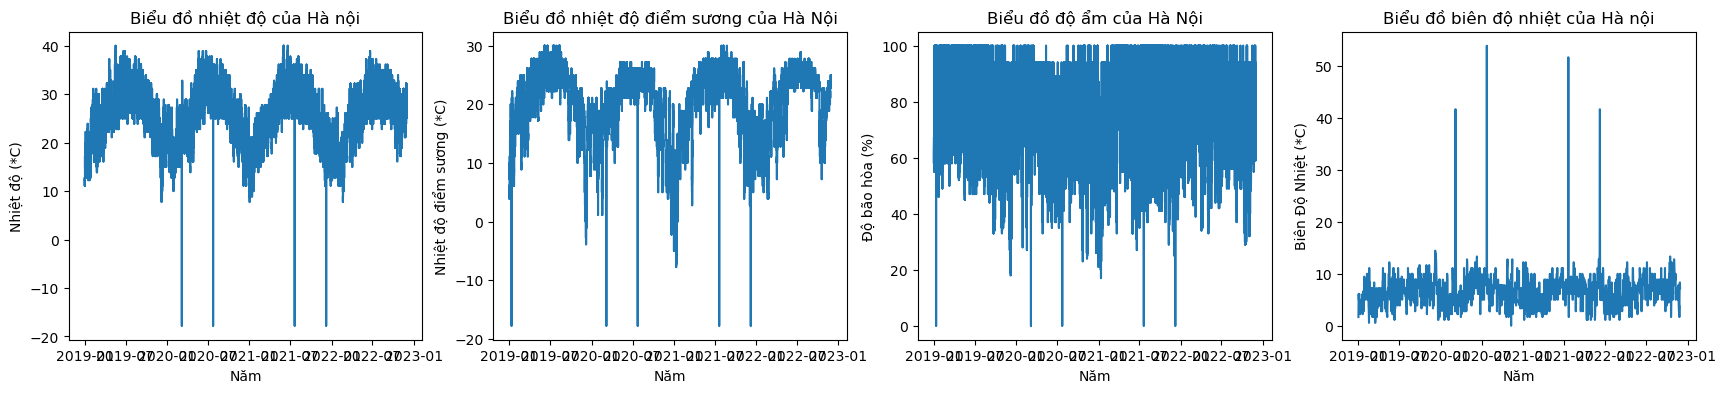

In [161]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize = (21,4))

axs[0].plot(df[df['Region']=='Ha Noi']['Date'],  df[df['Region']=='Ha Noi']['Temperature'])
# plt.plot(df['Date'],  df['Dew_Point'])
axs[0].set_title("Biểu đồ nhiệt độ của Hà nội")
axs[0].set_xlabel("Năm")
axs[0].set_ylabel("Nhiệt độ (*C)")

axs[1].plot(df[df['Region']=='Ha Noi']['Date'],  df[df['Region']=='Ha Noi']['Dew_Point'])
axs[1].set_title("Biểu đồ nhiệt độ điểm sương của Hà Nội")
axs[1].set_xlabel("Năm")
axs[1].set_ylabel("Nhiệt độ điểm sương (*C)")

axs[2].plot(df[df['Region']=='Ha Noi']['Date'],  df[df['Region']=='Ha Noi']['Humidity'])
axs[2].set_title("Biểu đồ độ ẩm của Hà Nội")
axs[2].set_xlabel("Năm")
axs[2].set_ylabel("Độ bão hòa (%)")

axs[3].plot(df[df['Region']=='Ha Noi']['Date'],  df[df['Region']=='Ha Noi']['Amplitude'])
axs[3].set_title("Biểu đồ biên độ nhiệt của Hà nội")
axs[3].set_xlabel("Năm")
axs[3].set_ylabel("Biên Độ Nhiệt (*C)")
plt.show()

**Nhận xét:**
- Có nhiều điểm dữ liệu của 3 thuộc tính `Temperature`, `Dew_Point`, `Humidity` dưới 0*C. Đây là các quan sát không đo được nhiệt độ nên nó là 0*F và khi chuyển sang độ C nó thành giá trị âm => Ta có thể thay thể bằng các giá trị mean()
- vì có nhiều điểm nhiệt độ âm vì thế nên cx có nhiều điểm biên độ nhiệt rất cao, có khi lên tới gần 60 *C
- Ngoài ta ta còn nhân thấy được hầu như các thuộc tính đều có chu kì trong năm và được thể hiện rõ nhất là ở Hà Nội sau đó đến Đà Nẵng và cuối cùng là Sài Gòn. Lý giải cho điều đó vì Hà Nội có 4 mùa và ở SG chỉ có 2 mùa và không có mùa đông

Xử lý các dữ liệu lỗi của nhiệt độ `Temperature`, nhiệt độ điểm sương `Dew_Point` và Độ bão hòa `Humidity` dưới 0 độ C bằng cách sử dụng mean và thay thế lại thuộc tính biên độ nhiệt `Amplitude`

In [162]:
# có thể thay thế bằng phương pháp dự đoán sử dụng linear regression 
df['Temperature'][df['Temperature'] <=0] = df['Temperature'].mean()
df['Dew_Point'][df['Dew_Point'] <=0] = df['Dew_Point'].mean()
df['Humidity'][df['Humidity'] <=0] = df['Humidity'].mean()

C:\Users\BEST PC\AppData\Local\Temp\ipykernel_19312\2862181015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temperature'][df['Temperature'] <=0] = df['Temperature'].mean()
C:\Users\BEST PC\AppData\Local\Temp\ipykernel_19312\2862181015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dew_Point'][df['Dew_Point'] <=0] = df['Dew_Point'].mean()
C:\Users\BEST PC\AppData\Local\Temp\ipykernel_19312\2862181015.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [163]:
df

,Date,Amplitude,Time,Temperature,Dew_Point,Humidity,Wind,Wind_Speed,Pressure,Condition,Region
0,2019-01-02,2.222222,12:00 AM,25.000000,20.000000,74.0,N,9.0,29.85,Mostly Cloudy,Sai Gon
1,2019-01-02,2.222222,12:30 AM,25.000000,20.000000,74.0,N,12.0,29.85,Mostly Cloudy,Sai Gon
2,2019-01-02,2.222222,1:00 AM,25.000000,20.000000,74.0,N,9.0,29.85,Mostly Cloudy,Sai Gon
3,2019-01-02,2.222222,1:30 AM,25.000000,20.000000,74.0,N,12.0,29.82,Mostly Cloudy,Sai Gon
4,2019-01-02,2.222222,2:00 AM,23.888889,20.000000,78.0,N,8.0,29.82,Mostly Cloudy,Sai Gon
...,...,...,...,...,...,...,...,...,...,...,...
204039,2022-11-29,7.222222,9:30 PM,27.222222,23.888889,84.0,SE,10.0,29.81,Mostly Cloudy,Ha Noi
204040,2022-11-29,7.222222,10:00 PM,26.111111,23.888889,89.0,ESE,9.0,29.84,Mostly Cloudy,Ha Noi
204041,2022-11-29,7.222222,10:30 PM,26.111111,23.888889,89.0,ESE,7.0,29.84,Mostly Cloudy,Ha Noi
204042,2022-11-29,7.222222,11:00 PM,26.111111,23.888889,89.0,ESE,10.0,29.84,Mostly Cloudy,Ha Noi


In [166]:
# Xử lý với biên độ nhiệt
df = df.drop(columns = ['Amplitude'])
df_sg = df[df['Region']=='Sai Gon']
df_dn = df[df['Region']=='Da Nang']
df_hn =df[df['Region']=='Ha Noi']
amp_sg = pd.DataFrame(df_sg.groupby("Date")['Temperature'].max() - df_sg.groupby("Date")['Temperature'].min())
amp_sg.columns = ['Amplitude']
amp_sg = amp_sg.reset_index()
df_sg = pd.merge(amp_sg, df_sg, how="inner", on=["Date", "Date"])

amp_dn = pd.DataFrame(df_dn.groupby("Date")['Temperature'].max() - df_dn.groupby("Date")['Temperature'].min())
amp_dn.columns = ['Amplitude']
amp_dn = amp_dn.reset_index()
df_dn = pd.merge(amp_dn, df_dn, how="inner", on=["Date", "Date"])

amp_hn = pd.DataFrame(df_hn.groupby("Date")['Temperature'].max() - df_hn.groupby("Date")['Temperature'].min())
amp_hn.columns = ['Amplitude']
amp_hn = amp_hn.reset_index()
df_hn = pd.merge(amp_hn, df_hn, how="inner", on=["Date", "Date"])

df = df_sg.append(df_dn, ignore_index=True).append(df_hn, ignore_index=True)

C:\Users\BEST PC\AppData\Local\Temp\ipykernel_19312\84508974.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_sg.append(df_dn, ignore_index=True).append(df_hn, ignore_index=True)


In [129]:
# df['Month'] = pd.DatetimeIndex(df['Date']).month
# df['Year'] = pd.DatetimeIndex(df['Date']).year
# df.to_csv("dashboard_data.csv")

In [130]:
# df.to_csv("dashboard_data.csv")

### Mối tương quan giữ các biến

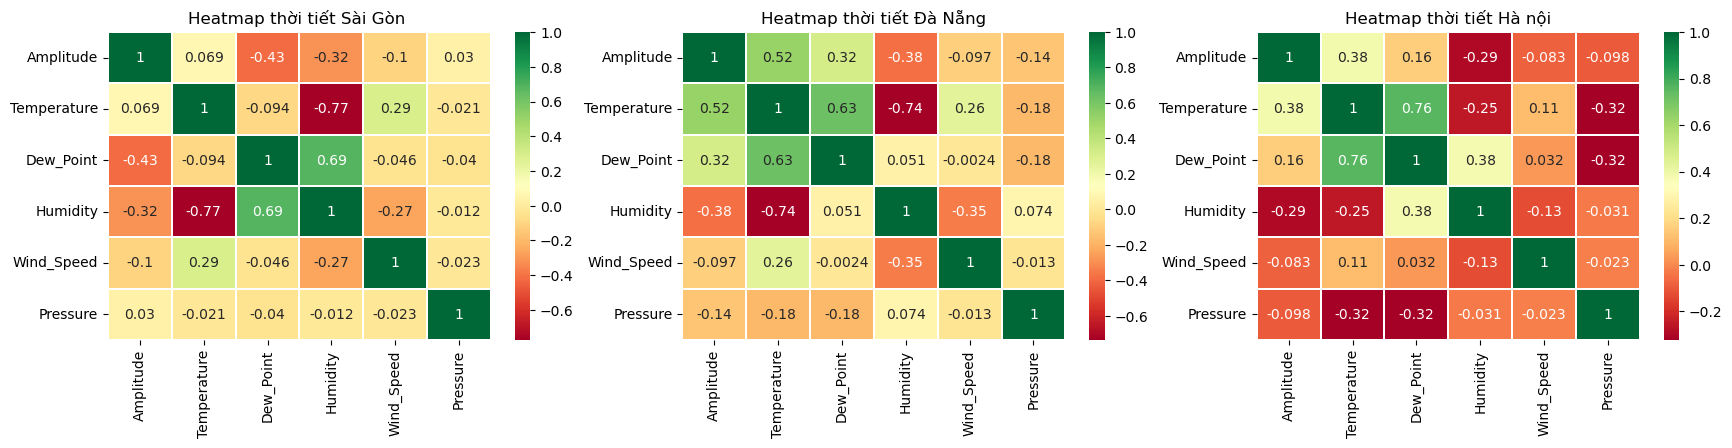

In [168]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (21,4))
df[df['Region']=='Sai Gon'].corr()
df[df['Region']=='Da Nang'].corr()
df[df['Region']=='Ha Noi'].corr()

sns.heatmap(df[df['Region']=='Sai Gon'].corr(), cmap ='RdYlGn', linewidths = 0.30, annot = True, ax=axs[0])
axs[0].set_title("Heatmap thời tiết Sài Gòn ")

sns.heatmap(df[df['Region']=='Da Nang'].corr(), cmap ='RdYlGn', linewidths = 0.30, annot = True, ax=axs[1])
axs[1].set_title("Heatmap thời tiết Đà Nẵng")

sns.heatmap(df[df['Region']=='Ha Noi'].corr(), cmap ='RdYlGn', linewidths = 0.30, annot = True, ax=axs[2])
axs[2].set_title("Heatmap thời tiết Hà nội")

plt.show()

**Nhận xét:** Nhìn vào heatmap cho ta một vài thông tin khá là thú vị:
-	Ở Sài gòn, độ ẩm `Humidity` và nhiệt độ điểm sương `Dew Point` là 2 thuộc tính có mỗi tương quan cao nhất nhưng chỉ ở mức 0.69. Ngược lại độ ẩm `Humidity` và nhiệt độ `temperature` tuy có tương quan nghịch nhưng sự tương quan khá là cao - 0.77
-	ở Đà Nẵng và Hà Nội lại có mối tương thuận quan giữ nhiệt độ điểm sương `Dew Point` và nhiệt độ `Temperature` với 0.63 và 0.76 theo từng vùng. Ngoài ra, mối tương quan nghich giữa hai biến độ ẩm `Huminity` và nhiệt độ `Temperature` cũng rất có ý nghĩa khi mà nó có giá trị lên tới – 0.74.


In [132]:
# pearson_coef_length, p_value_length = stats.pearsonr(df['Dew_Point'], df['Temperature'])
# print("Hệ số Pearson là:", pearson_coef_length, "và P-value là:", p_value_length)  

### Sự phự thuộc của độ ẩm (Humidity) và nhiệt độ (temperature)

In [88]:
df.columns

Index(['Date', 'Amplitude', 'Time', 'Temperature', 'Dew_Point', 'Humidity',
       'Wind', 'Wind_Speed', 'Pressure', 'Condition', 'Region', 'Month',
       'Year'],
      dtype='object')

C:\Users\BEST PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\BEST PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\BEST PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


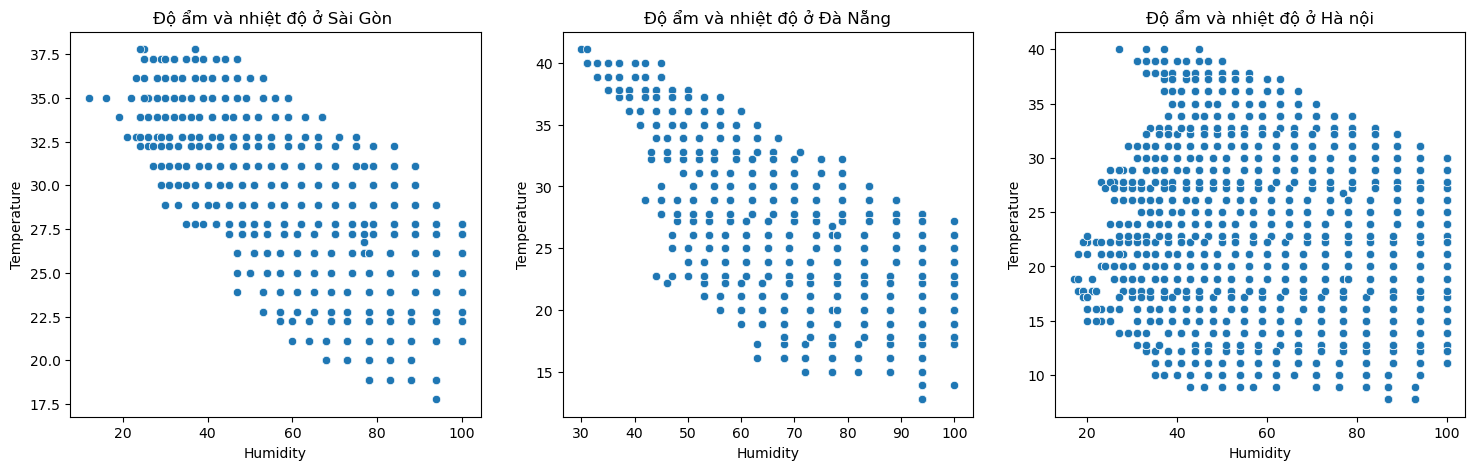

In [176]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (18,5))
df_sg = df[df['Region']=='Sai Gon']
df_dn = df[df['Region']=='Da Nang']
df_hn =df[df['Region']=='Ha Noi']

sns.scatterplot(df_sg['Humidity'],df_sg['Temperature'], ax=axs[0])
axs[0].set_title("Độ ẩm và nhiệt độ ở Sài Gòn ")

sns.scatterplot( df_dn['Humidity'],df_dn['Temperature'], ax=axs[1])
axs[1].set_title("Độ ẩm và nhiệt độ ở Đà Nẵng")

sns.scatterplot( df_hn['Humidity'], df_hn['Temperature'], ax=axs[2])
axs[2].set_title("Độ ẩm và nhiệt độ ở Hà nội")

plt.show()

Hầu như chỉ có ở Hà Nội biên độ nhiệt càng cao thì nhiệt độ càng thấp. Trong khi đó, ở Đà Nẵng và Sài Gòn hầu như 2 thuộc tính này ko liên quan gì nhiều đến nhau

### Sự phụ thuộc của độ ẩm (Humidity) và nhiệt độ điểm sương (Dew Point)

C:\Users\BEST PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\BEST PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\BEST PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


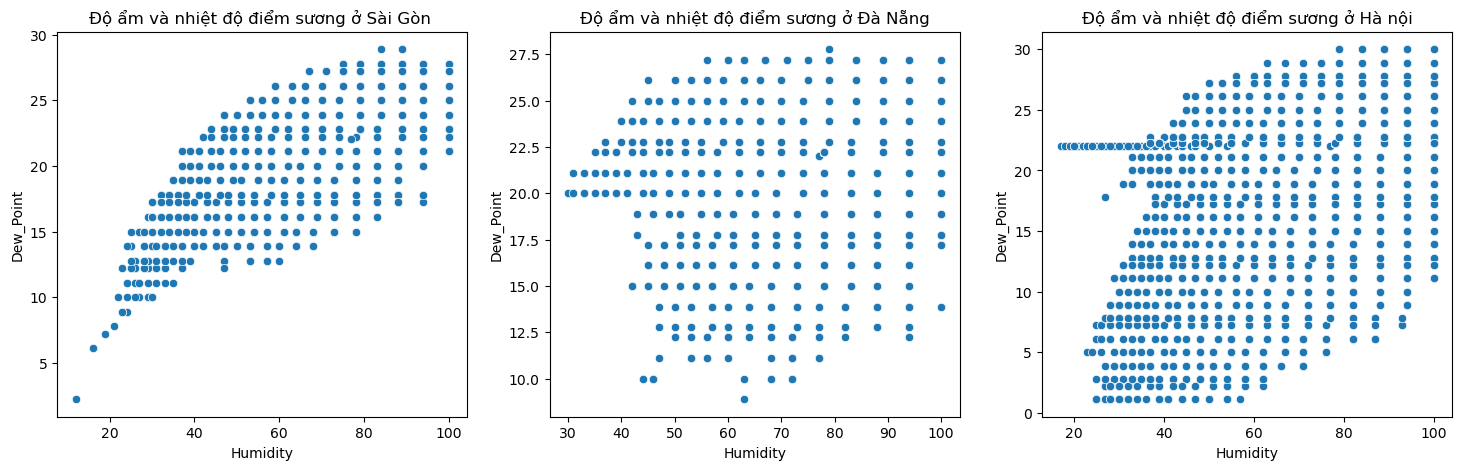

In [171]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (18,5))
df_sg = df[df['Region']=='Sai Gon']
df_dn = df[df['Region']=='Da Nang']
df_hn =df[df['Region']=='Ha Noi']

sns.scatterplot(df_sg['Humidity'],df_sg['Dew_Point'], ax=axs[0])
axs[0].set_title("Độ ẩm và nhiệt độ điểm sương ở Sài Gòn ")

sns.scatterplot(df_dn['Humidity'], df_dn['Dew_Point'], ax=axs[1])
axs[1].set_title("Độ ẩm và nhiệt độ điểm sương ở Đà Nẵng")

sns.scatterplot(df_hn['Humidity'], df_hn['Dew_Point'], ax=axs[2])
axs[2].set_title("Độ ẩm và nhiệt độ điểm sương ở Hà nội")

plt.show()

Ở Sài Gòn và Đà Nẵng ta có thể nhận thấy dường như nhiệt độ càng cao thì độ ẩm càng thấp vì ở đây đa phần không bị ảnh hưởng bởi không khí lạnh vì thế độ ẩm càng cao thì càng dễ mưa và đương nhiên nhiệt độ sẽ càng giảm. Với Hà Nội thì lại khác, ngoài việc nhiệt độ bị ảnh hưởng bởi độ ẩm thì còn bị ảnh hưởng bới không khí lạnh từ miền bắc và mỗi mùa đông thì hầu như nhiệt độ rất là lạnh và độ ẩm cũng rất là thấp vì thế nên nhìn chung chúng ta sẽ thấy dường như nhiệt độ và độ ẩm ở hà nội không có ảnh hưởng tới nhau

### Sự phụ thuộc của nhiệt độ điểm sương (Dew Point)  và nhiệt độ (Temperature)

C:\Users\BEST PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\BEST PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\BEST PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


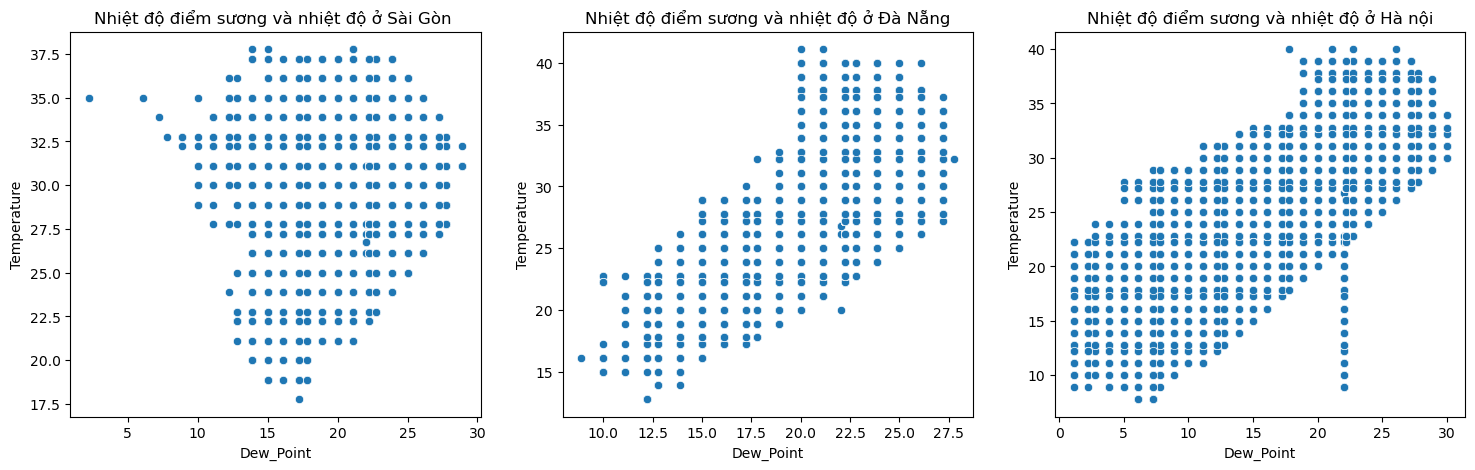

In [174]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (18,5))
df_sg = df[df['Region']=='Sai Gon']
df_dn = df[df['Region']=='Da Nang']
df_hn =df[df['Region']=='Ha Noi']

sns.scatterplot(df_sg['Dew_Point'],df_sg['Temperature'], ax=axs[0])
axs[0].set_title("Nhiệt độ điểm sương và nhiệt độ ở Sài Gòn ")

sns.scatterplot( df_dn['Dew_Point'],df_dn['Temperature'], ax=axs[1])
axs[1].set_title("Nhiệt độ điểm sương và nhiệt độ ở Đà Nẵng")

sns.scatterplot( df_hn['Dew_Point'], df_hn['Temperature'], ax=axs[2])
axs[2].set_title("Nhiệt độ điểm sương và nhiệt độ ở Hà nội")

plt.show()

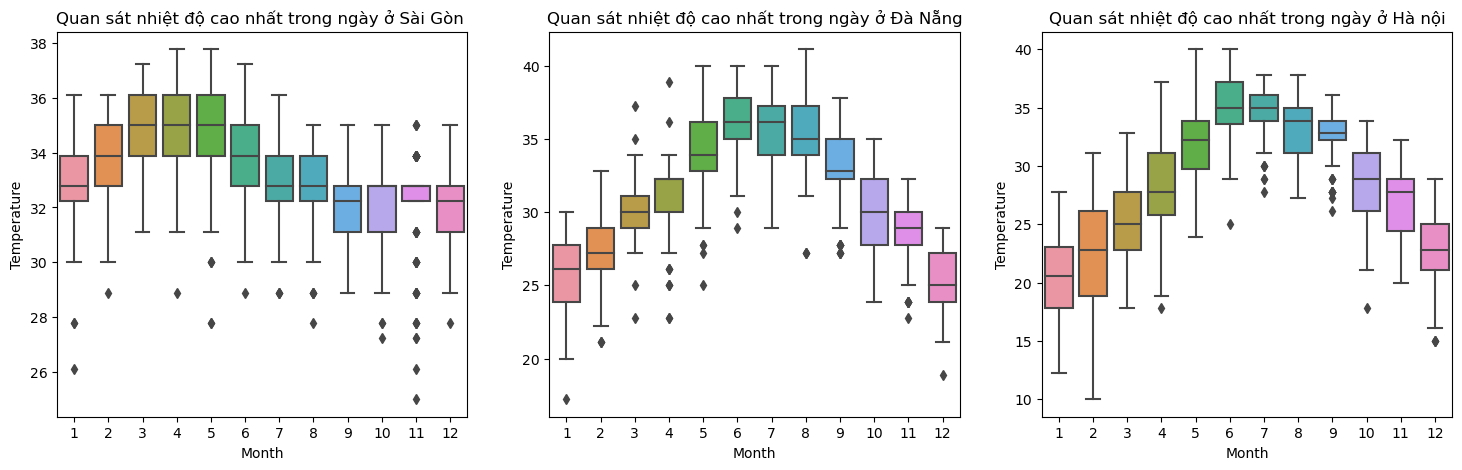

In [177]:
df['Month'] = pd.DatetimeIndex(df['Date']).month.astype(str)
df['year'] = pd.DatetimeIndex(df['Date']).year.astype(str)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (18,5))
df_sg = df[df['Region']=='Sai Gon'].groupby('Date').max()
df_dn = df[df['Region']=='Da Nang'].groupby('Date').max()
df_hn =df[df['Region']=='Ha Noi'].groupby('Date').max()

sns.boxplot(data = df_sg, x ="Month", y="Temperature", ax=axs[0])
axs[0].set_title("Quan sát nhiệt độ cao nhất trong ngày ở Sài Gòn ")

sns.boxplot(data = df_dn, x ="Month", y="Temperature", ax=axs[1])
axs[1].set_title("Quan sát nhiệt độ cao nhất trong ngày ở Đà Nẵng")

sns.boxplot(data = df_hn, x ="Month", y="Temperature", ax=axs[2])
axs[2].set_title("Quan sát nhiệt độ cao nhất trong ngày ở Hà nội")

plt.show()




**Nhận xét:**
- có nhiều điểm dữ liệu ngoại lệ trong bộ dữ liệu, nhưng với bộ dữ hiệu hơn 200 000 quan sát thì những ngoại lệ này không có gây tác động quá nhiều đến bộ dữ liệu và mô hình dự đoán nhiệt độ mà chúng ta sẽ triển khai ở phần tiếp theo

### Với các biến rời rạc

#### Hướng gió

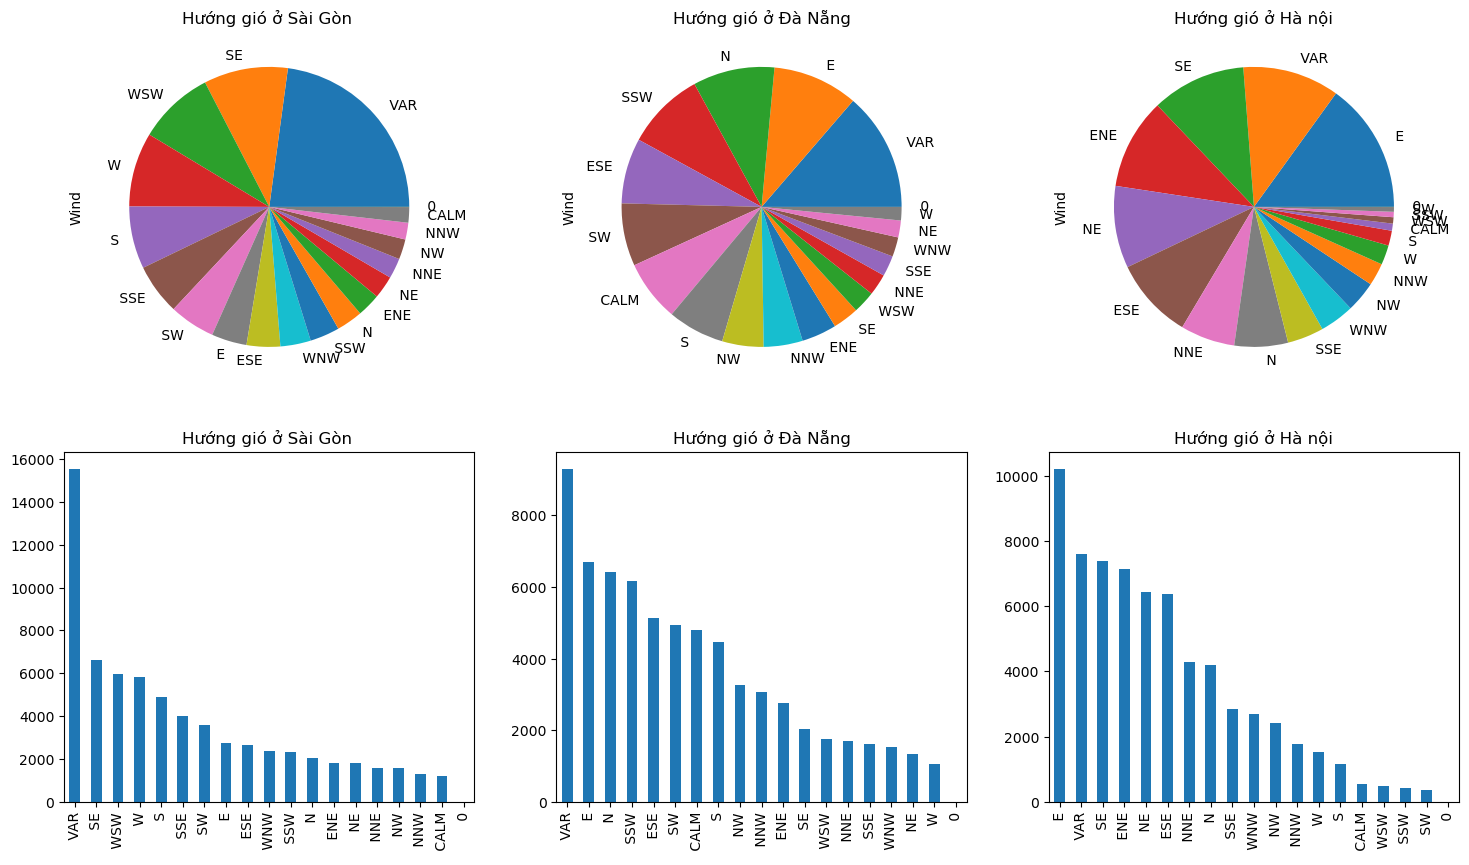

In [118]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

df_sg = df[df['Region']=='Sai Gon']['Wind'].value_counts()
df_dn = df[df['Region']=='Da Nang']['Wind'].value_counts()
df_hn =df[df['Region']=='Ha Noi']['Wind'].value_counts()

fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (18,10))

df_sg.plot(kind='pie', ax=axs[0][0] )
axs[0][0].set_title("Hướng gió ở Sài Gòn ")

df_dn.plot(kind='pie', ax=axs[0][1])
axs[0][1].set_title("Hướng gió ở Đà Nẵng")

df_hn.plot(kind='pie', ax=axs[0][2])
axs[0][2].set_title("Hướng gió ở Hà nội")

df_sg.plot(kind='bar', ax=axs[1][0] )
axs[1][0].set_title("Hướng gió ở Sài Gòn ")

df_dn.plot(kind='bar', ax=axs[1][1])
axs[1][1].set_title("Hướng gió ở Đà Nẵng")

df_hn.plot(kind='bar', ax=axs[1][2])
axs[1][2].set_title("Hướng gió ở Hà nội")

plt.show()



**Nhận xét:**
- sdf

#### Điều kiện thời tiết

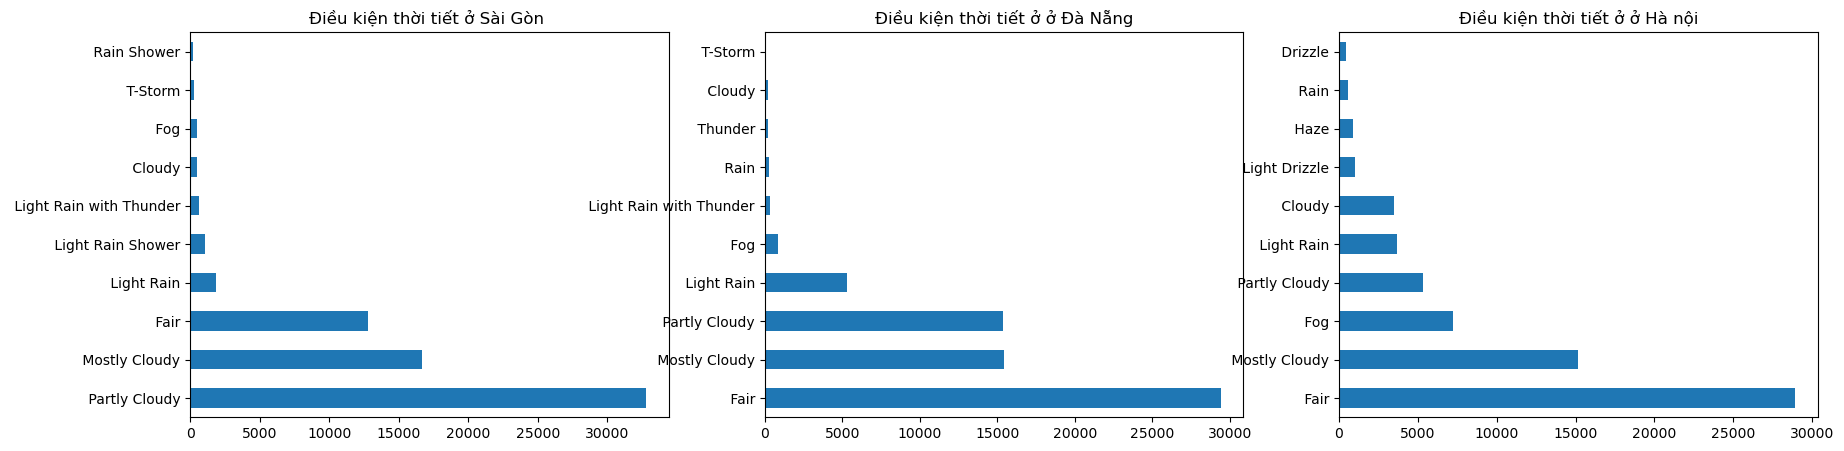

In [133]:
df_sg = df[df['Region']=='Sai Gon']['Condition'].value_counts()[:10]
df_dn = df[df['Region']=='Da Nang']['Condition'].value_counts()[:10]
df_hn =df[df['Region']=='Ha Noi']['Condition'].value_counts()[:10]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (21,5))

df_sg.plot(kind='barh', ax=axs[0] )
axs[0].set_title("Điều kiện thời tiết ở Sài Gòn ")

df_dn.plot(kind='barh', ax=axs[1])
axs[1].set_title("Điều kiện thời tiết ở ở Đà Nẵng")

df_hn.plot(kind='barh', ax=axs[2])
axs[2].set_title("Điều kiện thời tiết ở ở Hà nội")

plt.show()

**Nhận xét**
- Ở Sài Gòn số thời điểm nhiều mây rất là lớn và số thời điểm được đánh giá là đẹp (Fair) thì là đứng thứ 3 còn lại là những ngày mưa. Điều này cho thấy phần nào lượng mưa của sài gòn rất nhiều
- Ngược lại với Sài Gòn, Hà Nội và Đà Nẵng thì số thời điểm trời đẹp (Fair) lại chiếm đa số, trong khi thời điểm xảy ra mưa thì lại ít hơn
